In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/CrudeOil.csv')
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jul 01, 2022",106.01,109.34,104.56,108.43,108.43,"305,338"
1,"Jun 30, 2022",109.70,110.45,105.10,105.76,105.76,"362,890"
2,"Jun 29, 2022",111.86,114.05,109.22,109.78,109.78,"322,060"
3,"Jun 28, 2022",110.18,112.22,109.62,111.76,111.76,"306,748"
4,"Jun 27, 2022",107.22,110.54,105.60,109.57,109.57,"282,914"


In [4]:
df.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
5024,"Jul 09, 2002",25.87,26.20,25.73,26.09,26.09,"84,852"
5025,"Jul 08, 2002",26.25,26.86,25.90,26.07,26.07,"75,606"
5026,"Jul 03, 2002",26.68,26.95,26.38,26.80,26.80,"62,869"
5027,"Jul 02, 2002",27.00,27.15,26.63,26.77,26.77,"64,641"
5028,"Jul 01, 2002",26.80,27.15,26.61,26.81,26.81,"43,853"


In [5]:
df.shape

(5029, 7)

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

In [7]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5029 non-null   object 
 1   Open         5029 non-null   float64
 2   High         5029 non-null   float64
 3   Low          5029 non-null   float64
 4   Close*       5029 non-null   float64
 5   Adj Close**  5029 non-null   float64
 6   Volume       5029 non-null   object 
dtypes: float64(5), object(2)
memory usage: 275.1+ KB


In [8]:
# statiscal information
df.describe()

,Open,High,Low,Close*,Adj Close**
count,5029.000000,5029.000000,5029.000000,5029.000000,5029.000000
mean,66.385892,67.402688,65.301756,66.389781,66.389781
std,24.399530,24.627353,24.152038,24.418439,24.418439
min,-14.000000,13.690000,-40.320000,-37.630000,-37.630000
25%,47.890000,48.690000,46.960000,47.850000,47.850000
50%,62.750000,63.610000,61.860000,62.790000,62.790000
75%,86.200000,87.400000,85.060000,86.200000,86.200000
max,145.190000,147.270000,143.220000,145.290000,145.290000


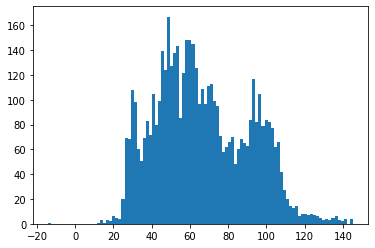

In [9]:
# distribution of data

plt.hist(df['Open'], bins = 100)
plt.show()

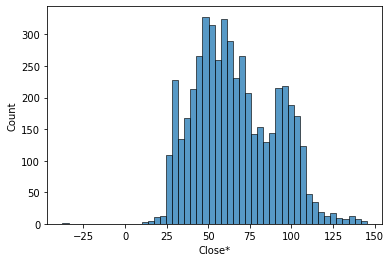

In [10]:
sns.histplot(df['Close*'], bins = 50)

In [11]:
# missing values
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [12]:
# drop useless columns
df.drop('Adj Close**' , axis = 1, inplace= True)

In [28]:
df=df.rename(columns={'Close*':'Close'})

In [29]:
df.head()

,Date,Open,High,Low,Close,Volume
0,"Jul 01, 2022",106.01,109.34,104.56,108.43,"305,338"
1,"Jun 30, 2022",109.70,110.45,105.10,105.76,"362,890"
2,"Jun 29, 2022",111.86,114.05,109.22,109.78,"322,060"
3,"Jun 28, 2022",110.18,112.22,109.62,111.76,"306,748"
4,"Jun 27, 2022",107.22,110.54,105.60,109.57,"282,914"


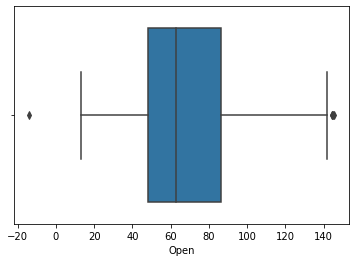

In [30]:
# outliear detection
sns.boxplot(df['Open'])

In [31]:
# IQR
Q1 = df['Open'].quantile(0.25)
Q3 = df['Open'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

38.31


In [1]:
max = Q3 + IQR
max

NameError: name 'Q3' is not defined

In [33]:
min = Q1 - 1.5* IQR
min

-9.575000000000003

In [34]:
df1 = df[(min < df['Open']) & (df['Open'] < max)]
df1.shape


(4976, 6)

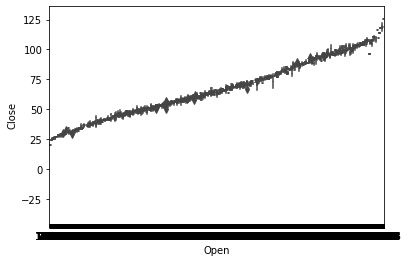

In [35]:
sns.boxplot(x = df1['Open'],y = df1['Close'])
plt.show()

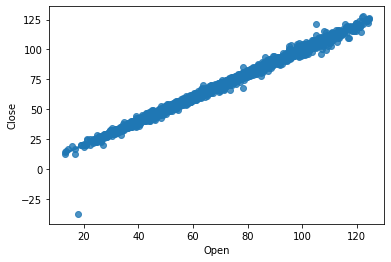

In [36]:
sns.regplot(df1['Open'], df1['Close'])
plt.show()

In [37]:
# pearson correlation
df1.corr()

,Open,High,Low,Close
Open,1.000000,0.999111,0.998409,0.997623
High,0.999111,1.000000,0.998013,0.998537
Low,0.998409,0.998013,1.000000,0.999214
Close,0.997623,0.998537,0.999214,1.000000


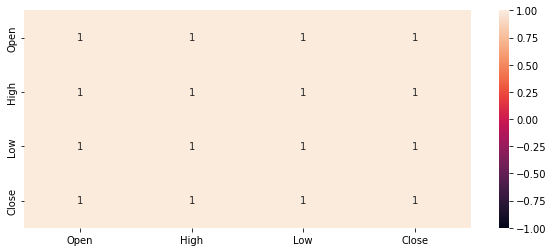

In [38]:
plt.figure(figsize = (10,4))
sns.heatmap(df1.corr(method = 'spearman'), annot = True, vmin = -1 , vmax = 1)
plt.show()